In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re

In [2]:
df=pd.read_csv("df_classed.csv", index_col=0)
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,class
0,1,1.0,0,1,1,1,10,7,NaN,4,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,f0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,f0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,f0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,f0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,f0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,m0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,m0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,m0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0,m0


In [3]:
#Drop Missing Values in "pid"
df=df.dropna(subset=["pid"])

In [4]:
#Change datatype of "pid" from float to integer
df["pid"].astype(int)

0        11
1        12
2        13
3        14
4        15
       ... 
8373    526
8374    527
8375    528
8376    529
8377    530
Name: pid, Length: 8368, dtype: int64

In [5]:
#Create Dictionary {"iid": "class"}
dict_pid=pd.Series(df["class"].values,index=df.iid).to_dict()

In [6]:
 #Create new column "p_class" in original dataframe to add partner's class information
 df["p_class"]=df["pid"].apply(lambda x:dict_pid.get(x))

In [7]:
df["p_class"].value_counts()

f1    2660
m0    2660
f0    1524
m1    1524
Name: p_class, dtype: int64

In [8]:
df[(df["class"]=="f0") & (df["p_class"]=="m0")]["match"].sum()

161

In [9]:
df[(df["class"]=="f0") & (df["p_class"]=="m1")]["match"].sum()

66

In [10]:
df[(df["class"]=="f1") & (df["p_class"]=="m0")]["match"].sum()

332

In [11]:
df[(df["class"]=="f1") & (df["p_class"]=="m1")]["match"].sum()

131

In [12]:
#f1,m1 
match_f1_m1=131/929
print(match_f1_m1)

0.14101184068891282


In [13]:
#f1,m0
match_f1_m0=332/1731
print(match_f1_m0)

0.19179664933564414


In [14]:
#f0,m0
match_f0_m0=161/929
print(match_f0_m0)

0.17330462863293863


In [15]:
#f0,m1
match_f0_m1=66/595
print(match_f0_m1)

0.11092436974789915


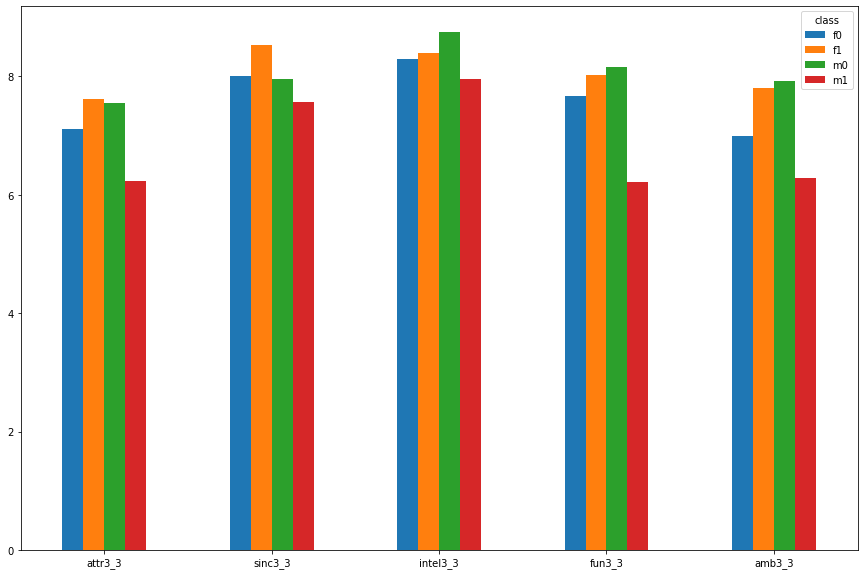

In [16]:
#Self Perception Analysis
df.groupby('class').mean().loc[:,['attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3']].T.plot.bar(figsize=(15,10),rot=360)

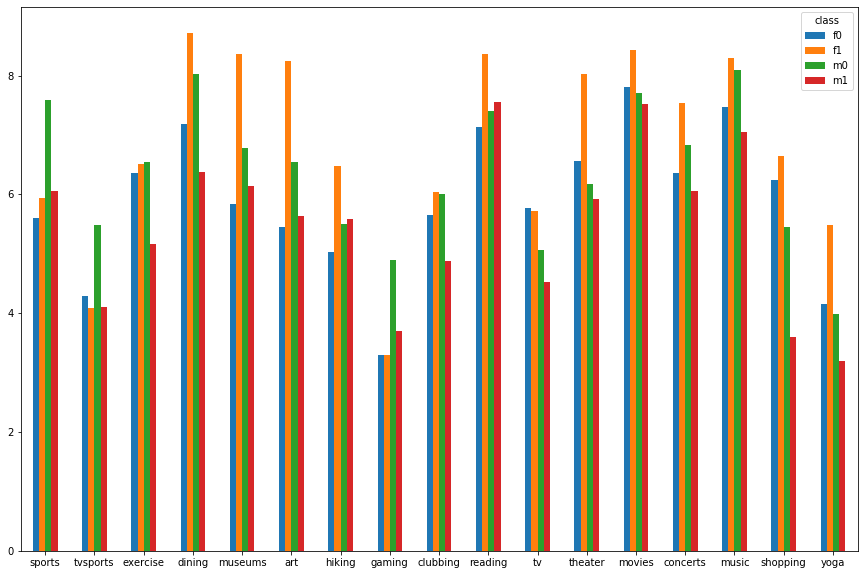

In [17]:
#Interest Analysis
df.groupby('class').mean().loc[:,['sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',]].T.plot.bar(figsize=(15,10),rot=360)

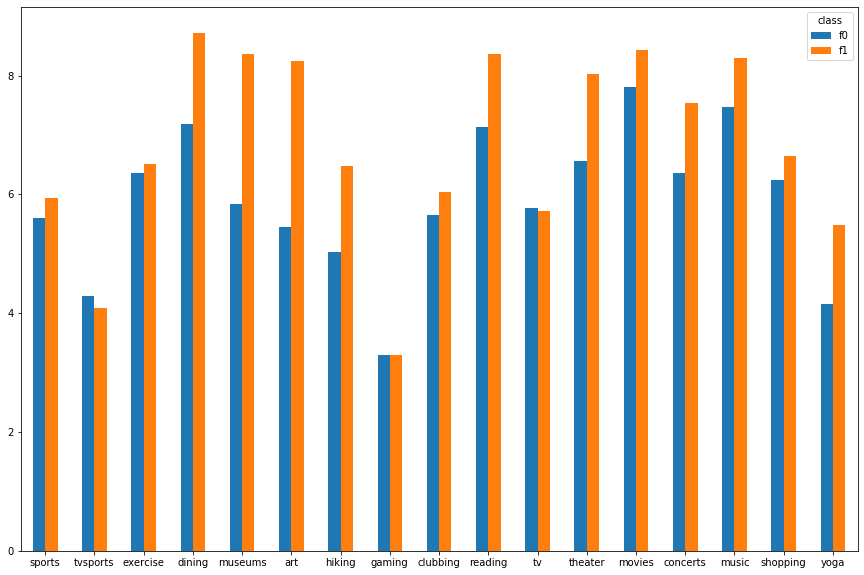

In [18]:
#Interest Analysis - Female
df[df['gender']==0].groupby('class').mean().loc[:,['sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',]].T.plot.bar(figsize=(15,10),rot=360)

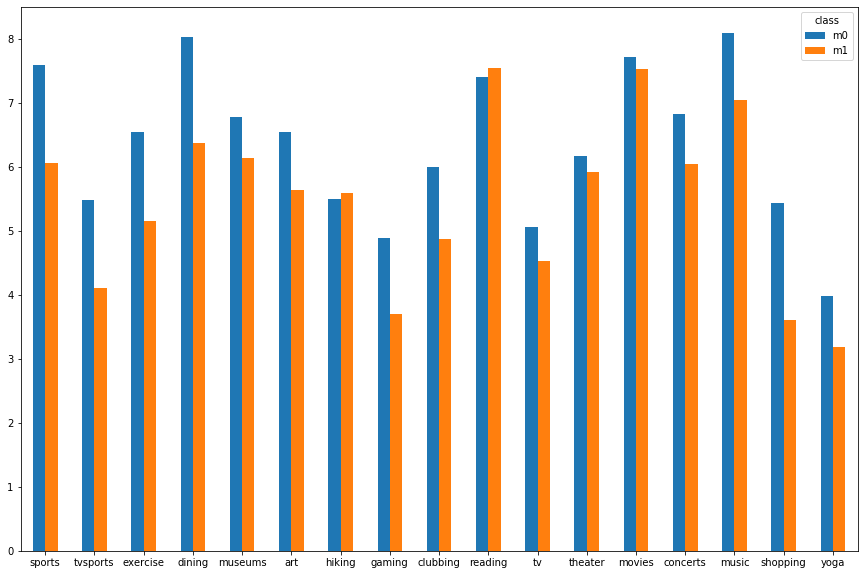

In [19]:
#Interest Analysis - Male
df[df['gender']==1].groupby('class').mean().loc[:,['sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',]].T.plot.bar(figsize=(15,10),rot=360)